#This notebook will permit you to manipulate Python libraries. It is divided into three parts. 

* Data Analysis and Manipulation (pandas)
* Data Preparation (Matplolib)
* Data Visualization (NumPy)


#Part I - Pandas
###Pandas is a fast, powerful, flexible and easy-to-use open source data analysis and manipulation library, built on top of the Python programming language.

###Description of the data

Titanic Data Set

The data set that we will be using is taken from Kaggle. The "***titanic-train.csv***" https://www.kaggle.com/hesh97/titanicdataset-traincsv file contains data for ***897*** of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the passenger which includes:

1. Passesnger ID
2. Whether they Survived
3. Passenger Class
4. Name
5. Sex
6. Age
7. Siblings Aboard
8. Parents Aboard
9. Ticket
10. Fare paid in £s
11. Cabin
12. Port of Embarkation 

On ***April 15, 1912***, the largest passenger liner ever made collided with an iceberg during her maiden voyage. When the Titanic sank it killed ***1502*** out of ***2224*** passengers and crew. This sensational tragedy shocked the international community and led to *better safety regulations for ships*. One of the reasons that the shipwreck resulted in such loss of life was that there were not enough *lifeboats *for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

In [0]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
# Connecting Google Drive Data Files to Google Colab Notebook.
# Load the Google Drive helper and mount the drive.
from google.colab import drive

# This will prompt for authorization. Click the link and provide the required information.

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# List the content of YOUR google drive
!ls "/content/drive/My Drive"

'Architecture Design .gdoc'	     'Datte Ibrahim - IA -Notes.gdoc'
'Ces idées qui collent (1).gslides'  'delib annuelle d2aw1.gsheet'
'Ces idées qui collent (2).gslides'   Exercices_chapitre_2.gdoc
'Ces idées qui collent (3).gslides'   GenericControler.java
'Ces idées qui collent.gslides'      'liste delegues UADB.gdoc'
'Colab Notebooks'		      Python.zip
 Cours_IA			     'Team 4 - Idea Proposal.gdoc'


In [0]:
# In this case, data is stored in the directory described below
# Change the directory based on YOUR own Google Drive organization
df = pd.read_csv('/content/drive/My Drive/Cours_IA/titanic-train.csv') #pd.read_csv() -> Read the data from specified location and stores in dataframe 'df'

In [0]:
type(df) # Type is used to check the type of a variable. In this case, df is a DataFrame.

pandas.core.frame.DataFrame

In [0]:
df.head() # Displaying the header which by default is the first 5 lines of the data.

In [0]:
df.info() 
# Gives information about the Data Frame. This is a summary of the data containing the total number of rows and columns and their types. 
# We can also detect if there are missing data.
# object are string data
# Example in 'Age' the total number of rows data is 714 which means that there are missing records as the total number of entries are 891.

In [0]:
df.describe() # Statistical summary of numeric data - minmum, maximum, std, mean etc. 

###Indexing
Pandas allows to index data in various ways.

In [0]:
df.iloc[3] # To retrieve the records based on the index. The index starts with 0 in Python. Here we get the data in the 4th row.

PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                  female
Age                                                      35
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Cabin                                                  C123
Embarked                                                  S
Name: 3, dtype: object

In [0]:
df.loc[0:4,'Ticket'] # To retreive the data for one coloumn and several rows.
                     # Here we get the Ticket colum of the first 5 rows.

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [0]:
df['Ticket'].head() # You can get first five rows of the colum Ticket with the help of head() function as well.

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [0]:
type(df[['Embarked', 'Ticket']]) # It is useful to check the types of expressions before using them.

pandas.core.frame.DataFrame

In [0]:
df[['Embarked', 'Ticket']].head() # You can get multiple coloumn data by providing the list as parameter. 
                                  #Here you get data of the 'Embarked' and 'Tickets' columns

,Embarked,Ticket
0,S,A/5 21171
1,C,PC 17599
2,S,STON/O2. 3101282
3,S,113803
4,S,373450


###Selections
Pandas allows to perform different selections.

In [0]:
df[df['Age'] > 65] # We can get the data of passengers whose age is above 65. To get the details information 
                   # We pass the condition to the DataFrame in square brackets. 
                   # Otherwise, you will get a list of values which says if the condition is true or false.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [0]:
df['Age'] > 65 # This statement displays if the condition is True or False.

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [0]:
df.query('Age > 65') # Query can also be used to select the data based on the condition passed as a string 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [0]:
df[(df['Age'] == 10) & (df['SibSp'] == 5)]  # Conditions can be combined with Boolean operators like AND, OR, and NOT. 
                                            # In this example we have combined two conditions.
                                            # Condition : Selection of passengers with 'Age' 10 AND 5 'siblings'. 
                                            # The condition is False so nothing is displayed.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [0]:
df[(df.Age == 10) | (df.SibSp == 5)]       # Here we are using OR.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,NaN,S
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.15,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.90,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.90,NaN,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.90,NaN,S


In [0]:
df.query('(Age == 10) | (SibSp == 5)') # Similarly, we can use query. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,NaN,S
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.15,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.90,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.90,NaN,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.90,NaN,S


###Unique Values

In [0]:
df['Embarked'].unique() # We can get the unique values from a column.

array(['S', 'C', 'Q', nan], dtype=object)

###Sorting

In [0]:
df.sort_values('Age', ascending = False).head() # Sort the data in DataFrame either in ascending or descending order for a column.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


###Aggregations
Like in SQL, Pandas allows you to do aggregations and group by.

In [0]:
df['Survived'].value_counts() # You can aggregate the data to get the number of survivors. 
                              # '0's' and '1's' values in the Survived field determine if a person survived or not.

0    549
1    342
Name: Survived, dtype: int64

In [0]:
df['Pclass'].value_counts() # Number of people per class

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [0]:
df.groupby(['Pclass', 'Survived'])['PassengerId'].count() # Number of survivors per class

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

In [0]:
df['Age'].min()

0.42

In [0]:
df['Age'].max()

80.0

In [0]:
df['Age'].mean()

29.69911764705882

In [0]:
df['Age'].median()

28.0

In [0]:
# Information about the survivors

In [0]:
mean_age_by_survived = df.groupby('Survived')['Age'].mean()
mean_age_by_survived

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [0]:
std_age_by_survived = df.groupby('Survived')['Age'].std()
std_age_by_survived

Survived
0    14.172110
1    14.950952
Name: Age, dtype: float64

In [0]:
min_age_by_survived = df.groupby('Survived')['Age'].min()
min_age_by_survived

Survived
0    1.00
1    0.42
Name: Age, dtype: float64

In [0]:
max_age_by_survived = df.groupby('Survived')['Age'].max()
max_age_by_survived

Survived
0    74.0
1    80.0
Name: Age, dtype: float64

###Merging Two Data Frames.

In [0]:
df1 = mean_age_by_survived.round(0).reset_index()
df2 = std_age_by_survived.round(0).reset_index()

In [0]:
df1

,Survived,Age
0,0,31.0
1,1,28.0


In [0]:
df2

,Survived,Age
0,0,14.0
1,1,15.0


In [0]:
df3 = pd.merge(df1, df2, on='Survived')

In [0]:
df3

,Survived,Age_x,Age_y
0,0,31.0,14.0
1,1,28.0,15.0


In [0]:
df3.columns = ['Survived', 'Age Mean', 'Age Standard Deviation']

In [0]:
df3

,Survived,Age Mean,Age Standard Deviation
0,0,31.0,14.0
1,1,28.0,15.0


###Pivot Tables
You can reshuffle the data in Pivot tables similar to Excel PivotTables.

In [0]:
df.pivot_table(index='Pclass',
               columns='Survived',
               values='PassengerId',
               aggfunc='count')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


###Correlations
In Pandas you can also calculate correlations between features. 

In [0]:
correlated_with_survived = df.corr()['Survived'].sort_values()
correlated_with_survived

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [0]:
%matplotlib inline

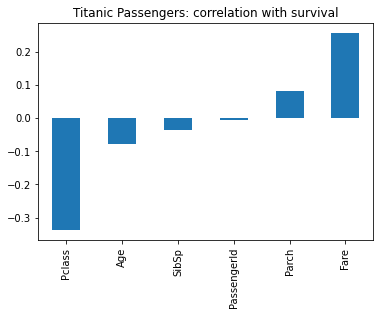

In [0]:
correlated_with_survived.iloc[:-1].plot(kind='bar',
                                        title='Titanic Passengers: correlation with survival')

#Part II - Visual Data Exploratory Analysis with Matplotlib

Matplotlib is a Python 2D plotting library which produces quality figures in a variety of hardcopy formats.

In [0]:
# Generating some random data for visualization!
data1 = np.random.normal(0, 0.1, 1000)
data2 = np.random.normal(1, 0.4, 1000) + np.linspace(0, 1, 1000)
data3 = 2 + np.random.random(1000) * np.linspace(1, 5, 1000)
data4 = np.random.normal(3, 0.2, 1000) + 0.3 * np.sin(np.linspace(0, 20, 1000))

In [0]:
data = np.vstack([data1, data2, data3, data4]).transpose() #with transpose() - Transposing the data.

In [0]:
df = pd.DataFrame(data, columns=['data1', 'data2', 'data3', 'data4'])
df.head()

,data1,data2,data3,data4
0,0.127983,0.923733,2.009912,2.884575
1,-0.048934,0.237768,2.404275,2.798310
2,0.015038,0.808314,2.155756,3.092428
3,-0.028115,1.245644,2.079441,3.089678
4,-0.057410,1.299702,2.288465,2.964889


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   1000 non-null   float64
 1   data2   1000 non-null   float64
 2   data3   1000 non-null   float64
 3   data4   1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


###Line Plot

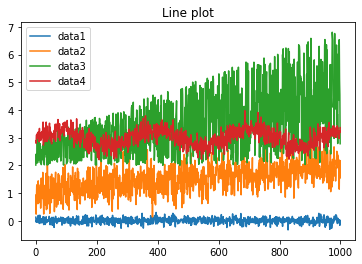

In [0]:
df.plot(title='Line plot')

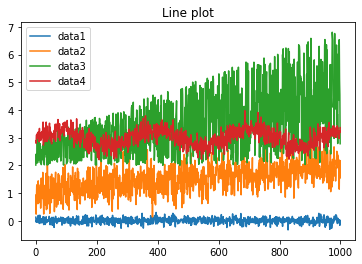

In [0]:
plt.plot(df)
plt.title('Line plot')
plt.legend(['data1', 'data2', 'data3', 'data4'])

###Scatter Plot

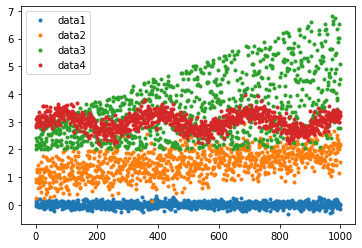

In [0]:
df.plot(style='.')

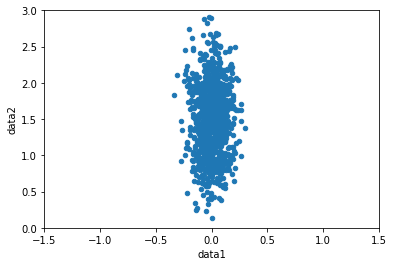

In [0]:
_ = df.plot(kind='scatter', x='data1', y='data2',
            xlim=(-1.5, 1.5), ylim=(0, 3))

###Histograms

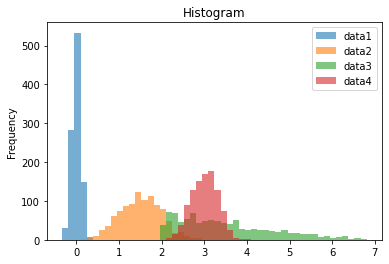

In [0]:
df.plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6)

###Cumulative distribution

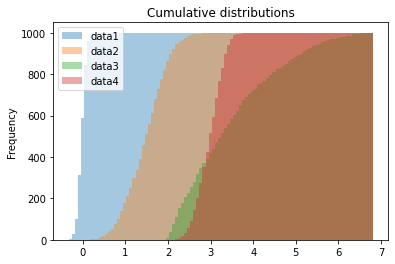

In [0]:
df.plot(kind='hist',
        bins=100,
        title='Cumulative distributions',
        #normed=True,
        cumulative=True,
        alpha=0.4)

###Box Plot

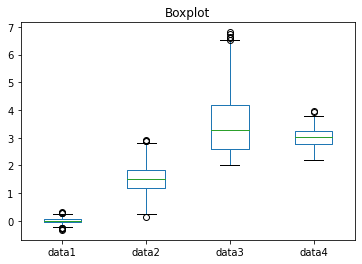

In [0]:
df.plot(kind='box',
        title='Boxplot')

###Subplots

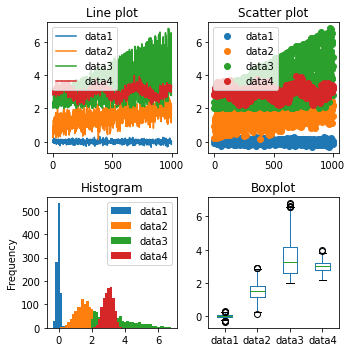

In [0]:
fig, ax = plt.subplots(2, 2, figsize=(5, 5))

df.plot(ax=ax[0][0],
        title='Line plot')

df.plot(ax=ax[0][1],
        style='o',
        title='Scatter plot')

df.plot(ax=ax[1][0],
        kind='hist',
        bins=50,
        title='Histogram')

df.plot(ax=ax[1][1],
        kind='box',
        title='Boxplot')

plt.tight_layout()

###Pie charts

In [0]:
gt01 = df['data1'] > 0.1
piecounts = gt01.value_counts()
piecounts

False    853
True     147
Name: data1, dtype: int64

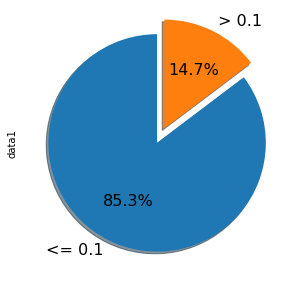

In [0]:
piecounts.plot(kind='pie',
               figsize=(5, 5),
               explode=[0, 0.15],
               labels=['<= 0.1', '> 0.1'],
               autopct='%1.1f%%',
               shadow=True,
               startangle=90,
               fontsize=16)

###Hexbin plot

In [0]:
data = np.vstack([np.random.normal((0, 0), 2, size=(1000, 2)),
                  np.random.normal((9, 9), 3, size=(2000, 2))])
df = pd.DataFrame(data, columns=['x', 'y'])

In [0]:
df.head()

,x,y
0,-1.654940,3.259895
1,1.734022,2.868981
2,-0.531273,1.159568
3,-1.682277,-0.377006
4,1.079985,-2.256921


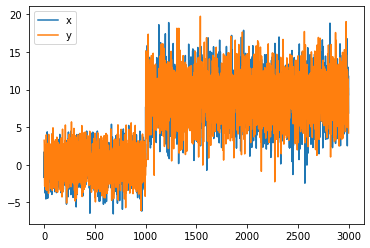

In [0]:
df.plot()

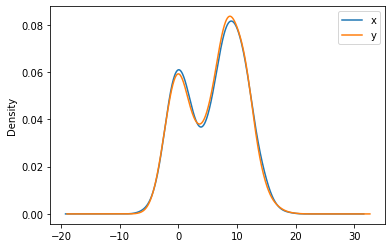

In [0]:
df.plot(kind='kde')

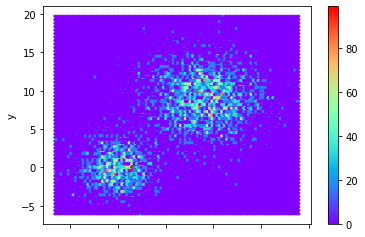

In [0]:
df.plot(kind='hexbin', x='x', y='y', bins=100, cmap='rainbow')

#Part III - Numpy 

###Linear Algebra with Numpy

In [0]:
a = np.array([1, 3, 2, 4])

In [0]:
a

array([1, 3, 2, 4])

In [0]:
type(a)

numpy.ndarray

In [0]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))
print("A is a " + str(A.shape) + " matrix")

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix
A is a (2, 3) matrix


In [0]:
A[0]

array([3, 1, 2])

In [0]:
C[2, 0]

4

In [0]:
B[:, 0]

array([0, 2, 4])

###Elementwise operations

In [0]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [0]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [0]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [0]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [0]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

###Dot product

In [0]:
A.shape

(2, 3)

In [0]:
B.shape

(3, 2)

In [0]:
A.dot(B) # Product of matrices

array([[10, 16],
       [22, 31]])

In [0]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [0]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [0]:
C.shape

(6, 2)

In [0]:
A.shape

(2, 3)

In [0]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

###Unstructured data: images, sounds etc.

Here we will explore images and sounds.

###Images

In [0]:
from PIL import Image

In [0]:
# Change the path to YOUR image
img = Image.open('/content/drive/My Drive/Cours_IA/WTC.jpg')
img

Output hidden; open in https://colab.research.google.com to view.

In [0]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [0]:
imgarray = np.asarray(img)

In [0]:
type(imgarray)

numpy.ndarray

In [0]:
imgarray.shape # 3 represents the RGB

(2330, 2250, 3)

In [0]:
imgarray.ravel().shape

(15727500,)

In [0]:
2330 * 2250 * 3

15727500

###Sound

In [0]:
from scipy.io import wavfile

In [0]:
rate, snd = wavfile.read(filename='/content/drive/My Drive/Cours_IA/sms.wav')

In [0]:
from IPython.display import Audio

In [0]:
Audio(data=snd, rate=rate)

In [0]:
len(snd)

110250

In [0]:
snd

array([70, 14, 27, ..., 58, 68, 59], dtype=int16)

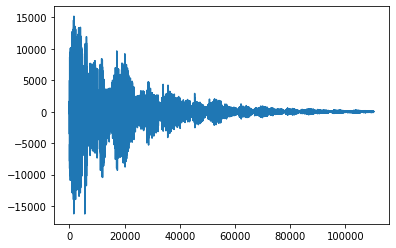

In [0]:
plt.plot(snd)

Text(0.5, 0, 'Time (s)')

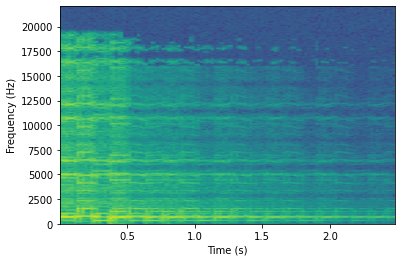

In [0]:

_ = plt.specgram(snd, NFFT=1024, Fs=44100)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')